# Решение задачи классификации на примере набора данных Iris
---

## Импортирование библиотек

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
## Загрузка набора данных

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Загружается встроенный датасет Iris из sklearn.datasets.
iris.keys() показывает доступные ключи (поля) датасета.

---
## Создание датафрейма pandas

In [3]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

Данные и целевая переменная (target) объединяются в один массив с помощью np.c_.   
Создается DataFrame с колонками:
- sepal length (cm), sepal width (cm), petal length (cm), petal width (cm) (признаки).
- target (метка класса: 0, 1, 2).
---

## Добавление текстовых меток классов

In [4]:
species = []
for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')
iris['species'] = species

Создается столбец species, где числовые метки (0, 1, 2) заменяются на текстовые (setosa, versicolor, virginica).

---

## Анализ данных

In [5]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Выводится количество примеров каждого класса (по 50 для каждого вида ириса).

---

## Визуализация данных

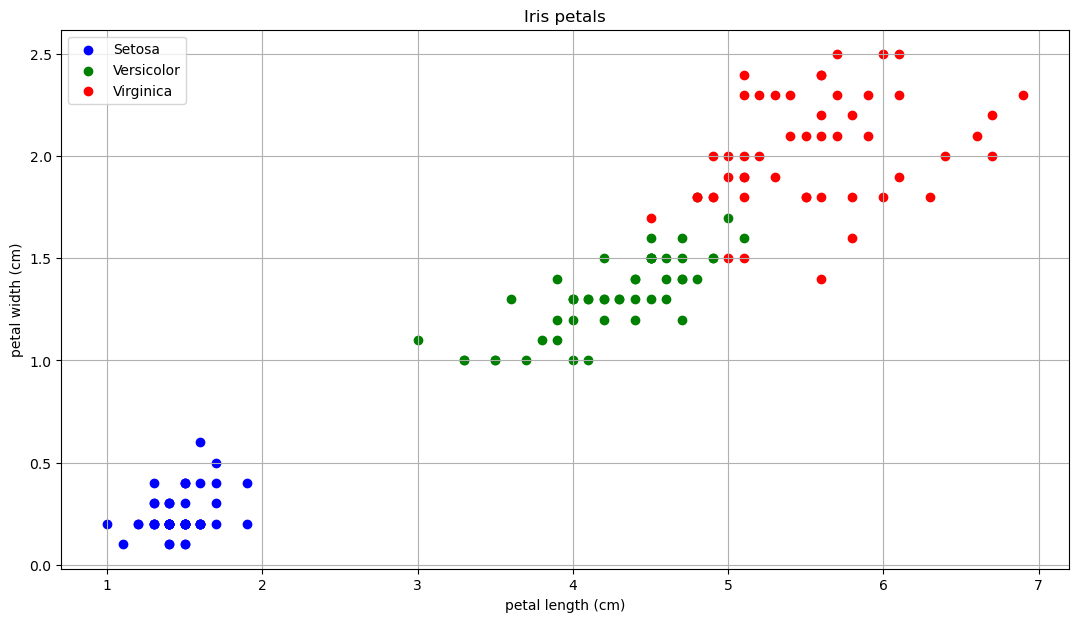

In [6]:
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

Строится scatter-график, отображающий зависимость petal width от petal length для каждого вида ириса.
Разные виды обозначены разными цветами.

---
## Подготовка данных для обучения

In [7]:
X = iris.drop(['target','species'], axis=1)
X = X.to_numpy()[:, (2,3)]  # Выбираются только petal length и petal width
y = iris['target']

X — матрица признаков (только petal length и petal width).   
y — целевая переменная (классы 0, 1, 2).

---

## Разделение данных на обучающую и тестовую выборки

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Данные делятся в соотношении 50% train / 50% test.   
random_state=42 фиксирует случайное разбиение для воспроизводимости.

---

## Обучение модели логистической регрессии

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Создается экземпляр модели LogisticRegression.
Происходит обучение модели на X_train, y_train.

---

## Предсказание на обучающей выборке и оценка качества

In [10]:
training_prediction = log_reg.predict(X_train)

print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(y_train, training_prediction, digits=3))
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        21
         1.0      0.923     0.889     0.906        27
         2.0      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75

[[21  0  0]
 [ 0 24  3]
 [ 0  2 25]]


Делаются предсказания на обучающей выборке (X_train).   
Выводится:
- classification_report — метрики precision, recall, f1-score, accuracy.
- confusion_matrix — матрица ошибок (сколько примеров каждого класса были предсказаны правильно/неправильно).
---